In [4]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [8]:
import os
import json
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [44]:
path = '../results/sampling_searching'
path_no = '../results/sampling_no_searching'
exps = sorted([exp[:-5] for exp in os.listdir(path)])

In [78]:
summary = pd.DataFrame(columns = ['dataset', 'model', 'sample', 'threshold', 'test score global', 'best test score','performance gap'])
df_best_score = pd.DataFrame(columns = ['dataset', 'model', 'best score'])
i = 0
for exp in exps:
    
    with open(f'{path}/{exp}.json', 'r') as fin:
        exp_summary = json.load(fin)
    with open(f'{path_no}/{exp}.json', 'r') as fin:
        exp_summary_no = json.load(fin)
    with open(f'../results/instance_selection/{exp}.json', 'r') as fin:
        best_score = json.load(fin)
        
    for model in ['SVC', 'KNeighborsClassifier', 'RandomForestClassifier', 'GradientBoostingClassifier']:
        summary.loc[i, 'model'] = model
        summary.loc[i, 'dataset'] = exp
        
        if model == 'GradientBoostingClassifier':
            
            summary.loc[i, 'best test score'] = exp_summary_no[model]['test_score']
            summary.loc[i, 'threshold'] = exp_summary_no[model]['threshold']
            summary.loc[i, 'sample'] = exp_summary_no[model]['sample_proportion']
            
        else:
            
            best_arg = np.argmax(np.array([exp_summary_no[model]['best_score'], exp_summary[model]['best_score']]))
            summary.loc[i, 'best test score'] = [exp_summary_no[model]['test_score'], exp_summary[model]['test_score']][best_arg]
            summary.loc[i, 'threshold'] = [exp_summary_no[model]['threshold'], exp_summary[model]['threshold']][best_arg]
            summary.loc[i, 'sample'] = [exp_summary_no[model]['sample_proportion'], exp_summary[model]['sample_proportion']][best_arg]
        
        if abs(best_score[model]['cv_score'][0]-1) < 10e-4:
            summary.loc[i, 'best test score'] = best_score[model]['test_score']
            summary.loc[i, 'threshold'] = 1
            summary.loc[i, 'sample'] = 1
            
        summary.loc[i, 'test score global'] = best_score[model]['test_score']
        summary.loc[i, 'complexity class difference'] = abs(exp_summary[exp]['info']['complexity']['class 0'][0] - exp_summary[exp]['info']['complexity']['class 1'][0])
        i += 1
summary.loc[:, 'performance gap'] = summary['test score global']-summary['best test score']

In [79]:
summary

,dataset,model,sample,threshold,test score global,best test score,performance gap,complexity class difference
0,a9a,SVC,0.77,0.4,0.785729,0.795881,-0.010152,0.285986
1,a9a,KNeighborsClassifier,0.73,0.35,0.764211,0.769157,-0.004946,0.285986
2,a9a,RandomForestClassifier,0.73,0.35,0.765829,0.7806,-0.014772,0.285986
3,a9a,GradientBoostingClassifier,0.85,0.5,0.788514,0.79489,-0.006376,0.285986
4,appendicitis,SVC,0.82,0.25,0.5,0.794003,-0.294003,0.329701
...,...,...,...,...,...,...,...,...
143,w7a,GradientBoostingClassifier,0.7,0.75,0.871733,0.871259,0.000473,0.274497
144,w8a,SVC,0.63,0.9,0.907425,0.907102,0.000323,0.265404
145,w8a,KNeighborsClassifier,0.63,0.85,0.885566,0.873941,0.011625,0.265404
146,w8a,RandomForestClassifier,0.62,0.5,0.909964,0.903203,0.006761,0.265404


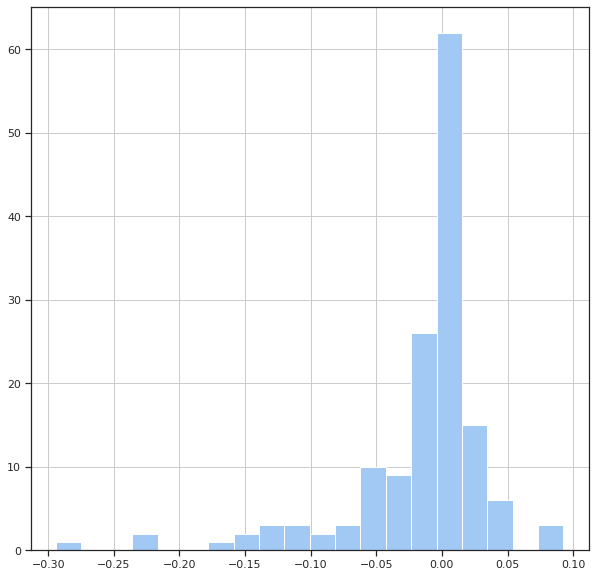

In [87]:
summary['performance gap'].hist(bins=20);

In [80]:
summary['performance gap'].astype(float).describe(percentiles=[i*0.1 for i in range(10)])

count    148.000000
mean      -0.016417
std        0.054374
min       -0.294003
0%        -0.294003
10%       -0.077094
20%       -0.035058
30%       -0.019100
40%       -0.005336
50%        0.000000
60%        0.000000
70%        0.005506
80%        0.012989
90%        0.023913
max        0.092498
Name: performance gap, dtype: float64

In [81]:
summary['sample'].astype(float).describe(percentiles=[i*0.1 for i in range(10)])

count    148.000000
mean       0.809257
std        0.206681
min        0.100000
0%         0.100000
10%        0.567000
20%        0.700000
30%        0.752000
40%        0.800000
50%        0.855000
60%        0.920000
70%        0.970000
80%        0.990000
90%        1.000000
max        1.000000
Name: sample, dtype: float64

In [83]:
summary['threshold'].astype(float).describe(percentiles=[i*0.1 for i in range(10)])

count    148.000000
mean       0.611149
std        0.274347
min        0.100000
0%         0.100000
10%        0.250000
20%        0.300000
30%        0.405000
40%        0.490000
50%        0.650000
60%        0.750000
70%        0.850000
80%        0.900000
90%        0.950000
max        1.000000
Name: threshold, dtype: float64

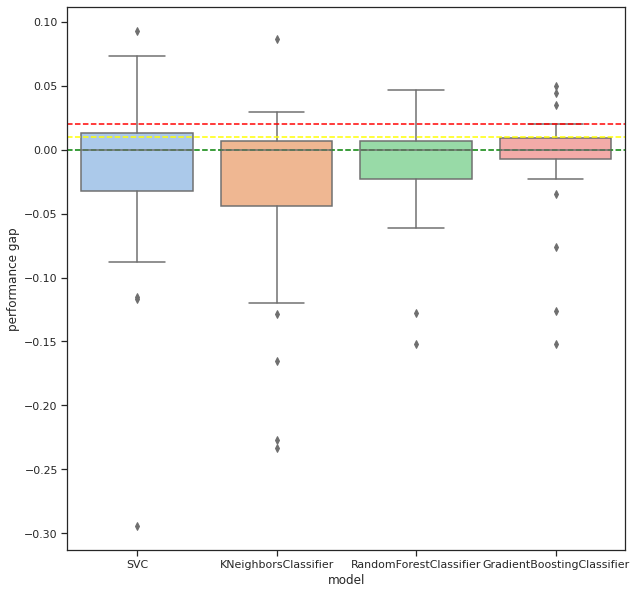

In [84]:
sns.set(rc={'figure.figsize':(10,10)})
sns.set_theme(style="ticks", palette="pastel")
sns.boxplot(data=summary, x="model", y='performance gap')
plt.axhline(0, ls='--', c='green')
plt.axhline(0.01, ls='--', c='yellow')
# plt.axhline(0.01, ls='--', c='orange')
plt.axhline(0.02, ls='--', c='red')
plt.show()

In [85]:
for model in ['SVC', 'KNeighborsClassifier', 'RandomForestClassifier', 'GradientBoostingClassifier']:
    print(model)
    print(summary[summary.model == model]['performance gap'].astype(float).describe(percentiles=[i*0.1 for i in range(10)]), '\n')

SVC
count    37.000000
mean     -0.018291
std       0.064272
min      -0.294003
0%       -0.294003
10%      -0.085629
20%      -0.041555
30%      -0.022828
40%      -0.008882
50%       0.000000
60%       0.000194
70%       0.006725
80%       0.016640
90%       0.026136
max       0.092498
Name: performance gap, dtype: float64 

KNeighborsClassifier
count    37.000000
mean     -0.028572
std       0.067562
min      -0.233487
0%       -0.233487
10%      -0.123249
20%      -0.057930
30%      -0.031911
40%      -0.007522
50%      -0.000555
60%       0.000000
70%       0.001887
80%       0.007836
90%       0.019971
max       0.086929
Name: performance gap, dtype: float64 

RandomForestClassifier
count    37.000000
mean     -0.011681
std       0.040386
min      -0.151957
0%       -0.151957
10%      -0.058218
20%      -0.032356
30%      -0.015758
40%      -0.004852
50%       0.000000
60%       0.000000
70%       0.005379
80%       0.013284
90%       0.023258
max       0.046483
Name: performance